In [5]:
from typing import Union
import random

import numpy as np
import matplotlib.pyplot as plt

In [6]:
def quadratic_map_iteration(
    xy: tuple[float, float],
    cx: float,
    ax1: float,
    ax2: float,
    bx1: float,
    bx2: float,
    abx: float,
    cy: float,
    ay1: float,
    ay2: float,
    by1: float,
    by2: float,
    aby: float,
) -> tuple[float, float]:
    x = xy[0]
    y = xy[1]
    x_new = ax1 * x + ax2 * x**2 + bx1 * y + bx2 * y**2 + abx * x * y + cx
    y_new = ay1 * x + ay2 * x**2 + by1 * y + by2 * y**2 + aby * x * y + cy
    return (x_new, y_new)

def quadratic_map(seed: Union[int, None] = None, iterations: int = 100000, parameters: dict[str, float] = {}, print_params: bool = False, check_convergence: bool = True, value_limit: int = 100000) -> tuple[int, int, np.ndarray, np.ndarray]:
    if seed is None:
        # Randomise the seed
        seed = random.randint(0, 1000000000000)
        random.seed(seed)
    else:
        # Set the seed
        random.seed(seed)

    # Starting points
    x = random.uniform(-0.5, 0.5)
    y = random.uniform(-0.5, 0.5)

    # Parameters
    param_lim = 2
    if parameters:
        cx = parameters["cx"]
        ax1 = parameters["ax1"]
        ax2 = parameters["ax2"]
        bx1 = parameters["bx1"]
        bx2 = parameters["bx2"]
        abx = parameters["abx"]
        cy = parameters["cy"]
        ay1 = parameters["ay1"]
        ay2 = parameters["ay2"]
        by1 = parameters["by1"]
        by2 = parameters["by2"]
        aby = parameters["aby"]
    else:
        cx = random.uniform(-param_lim, param_lim)
        ax1 = random.uniform(-param_lim, param_lim)
        ax2 = random.uniform(-param_lim, param_lim)
        bx1 = random.uniform(-param_lim, param_lim)
        bx2 = random.uniform(-param_lim, param_lim)
        abx = random.uniform(-param_lim, param_lim)
        cy = random.uniform(-param_lim, param_lim)
        ay1 = random.uniform(-param_lim, param_lim)
        ay2 = random.uniform(-param_lim, param_lim)
        by1 = random.uniform(-param_lim, param_lim)
        by2 = random.uniform(-param_lim, param_lim)
        aby = random.uniform(-param_lim, param_lim)
    
    if print_params:
        print("--- Parameters -----")
        print(f"cx: {cx}\nax1: {ax1}\nax2: {ax2}\nbx1: {bx1}\nbx2: {bx2}\nabx: {abx}\ncy: {cy}\nay1: {ay1}\nay2: {ay2}\nby1: {by1}\nby2: {by2}\naby: {aby}")
        print("--------------------")

    # Convergence check rate. Check that the points are not diverging at this rate
    convergence_check_rate = 100
    convergence_threshold = 0.000001

    # Arrays for plotting.
    # Initialise with nans so that we can plot the whole array even when the iteration stops early
    xs = np.full(iterations, np.nan)
    ys = np.full(iterations, np.nan)

    # Iterate
    completed = False
    reason = None
    stopped_at = None
    x_old = x
    y_old = y
    for i in range(iterations):
        x, y = quadratic_map_iteration(
            xy=(x, y),
            cx=cx,
            ax1=ax1,
            ax2=ax2,
            bx1=bx1,
            bx2=bx2,
            abx=abx,
            cy=cy,
            ay1=ay1,
            ay2=ay2,
            by1=by1,
            by2=by2,
            aby=aby,
        )

        if check_convergence:
            if i % convergence_check_rate == 0:
                # Check for convergence
                if abs(x - x_old) < convergence_threshold and abs(y - y_old) < convergence_threshold:
                    reason = "CONVERGENCE"
                    stopped_at = i
                    break
                x_old = x
                y_old = y


        # If the point is outside the limit, break
        if abs(x) > value_limit or abs(y) > value_limit:
            reason = "LIMIT REACHED"
            stopped_at = i
            break

        # Add to arrays
        xs[i] = x
        ys[i] = y

    else:
        completed = True

    if not completed:
        # print(f"Stopped after [{stopped_at}] iterations due to [{reason}].")
        return 0, seed, xs, ys
    return 1, seed, xs, ys

## Weird behaviour of this chaotic system
### The system is defined by the following equations:
$x_{i+1} = ax + bx^2 + cy + dy^2 + exy$

$y_{i+1} = fx + gx^2 + hy + iy^2 + jxy$

The following parameters produce chaotic behaviour:

```
parameters = {
    "cx": 0.3838553316339084,
    "ax1": -0.899810341784411,
    "ax2": 1.9205488476943802,
    "bx1": 0.12453878265145724,
    "bx2": -0.8166571696362626,
    "abx": 1.1693540077638689,
    "cy": -0.3785235686217754,
    "ay1": -0.3015972313215656,
    "ay2": 1.6636275870850334,
    "by1": 0.919314974001602,
    "by2": 0.65431157442239,
    "aby": 1.6164791960203302,
}
```

If we plot x and y after many iterations, we get:

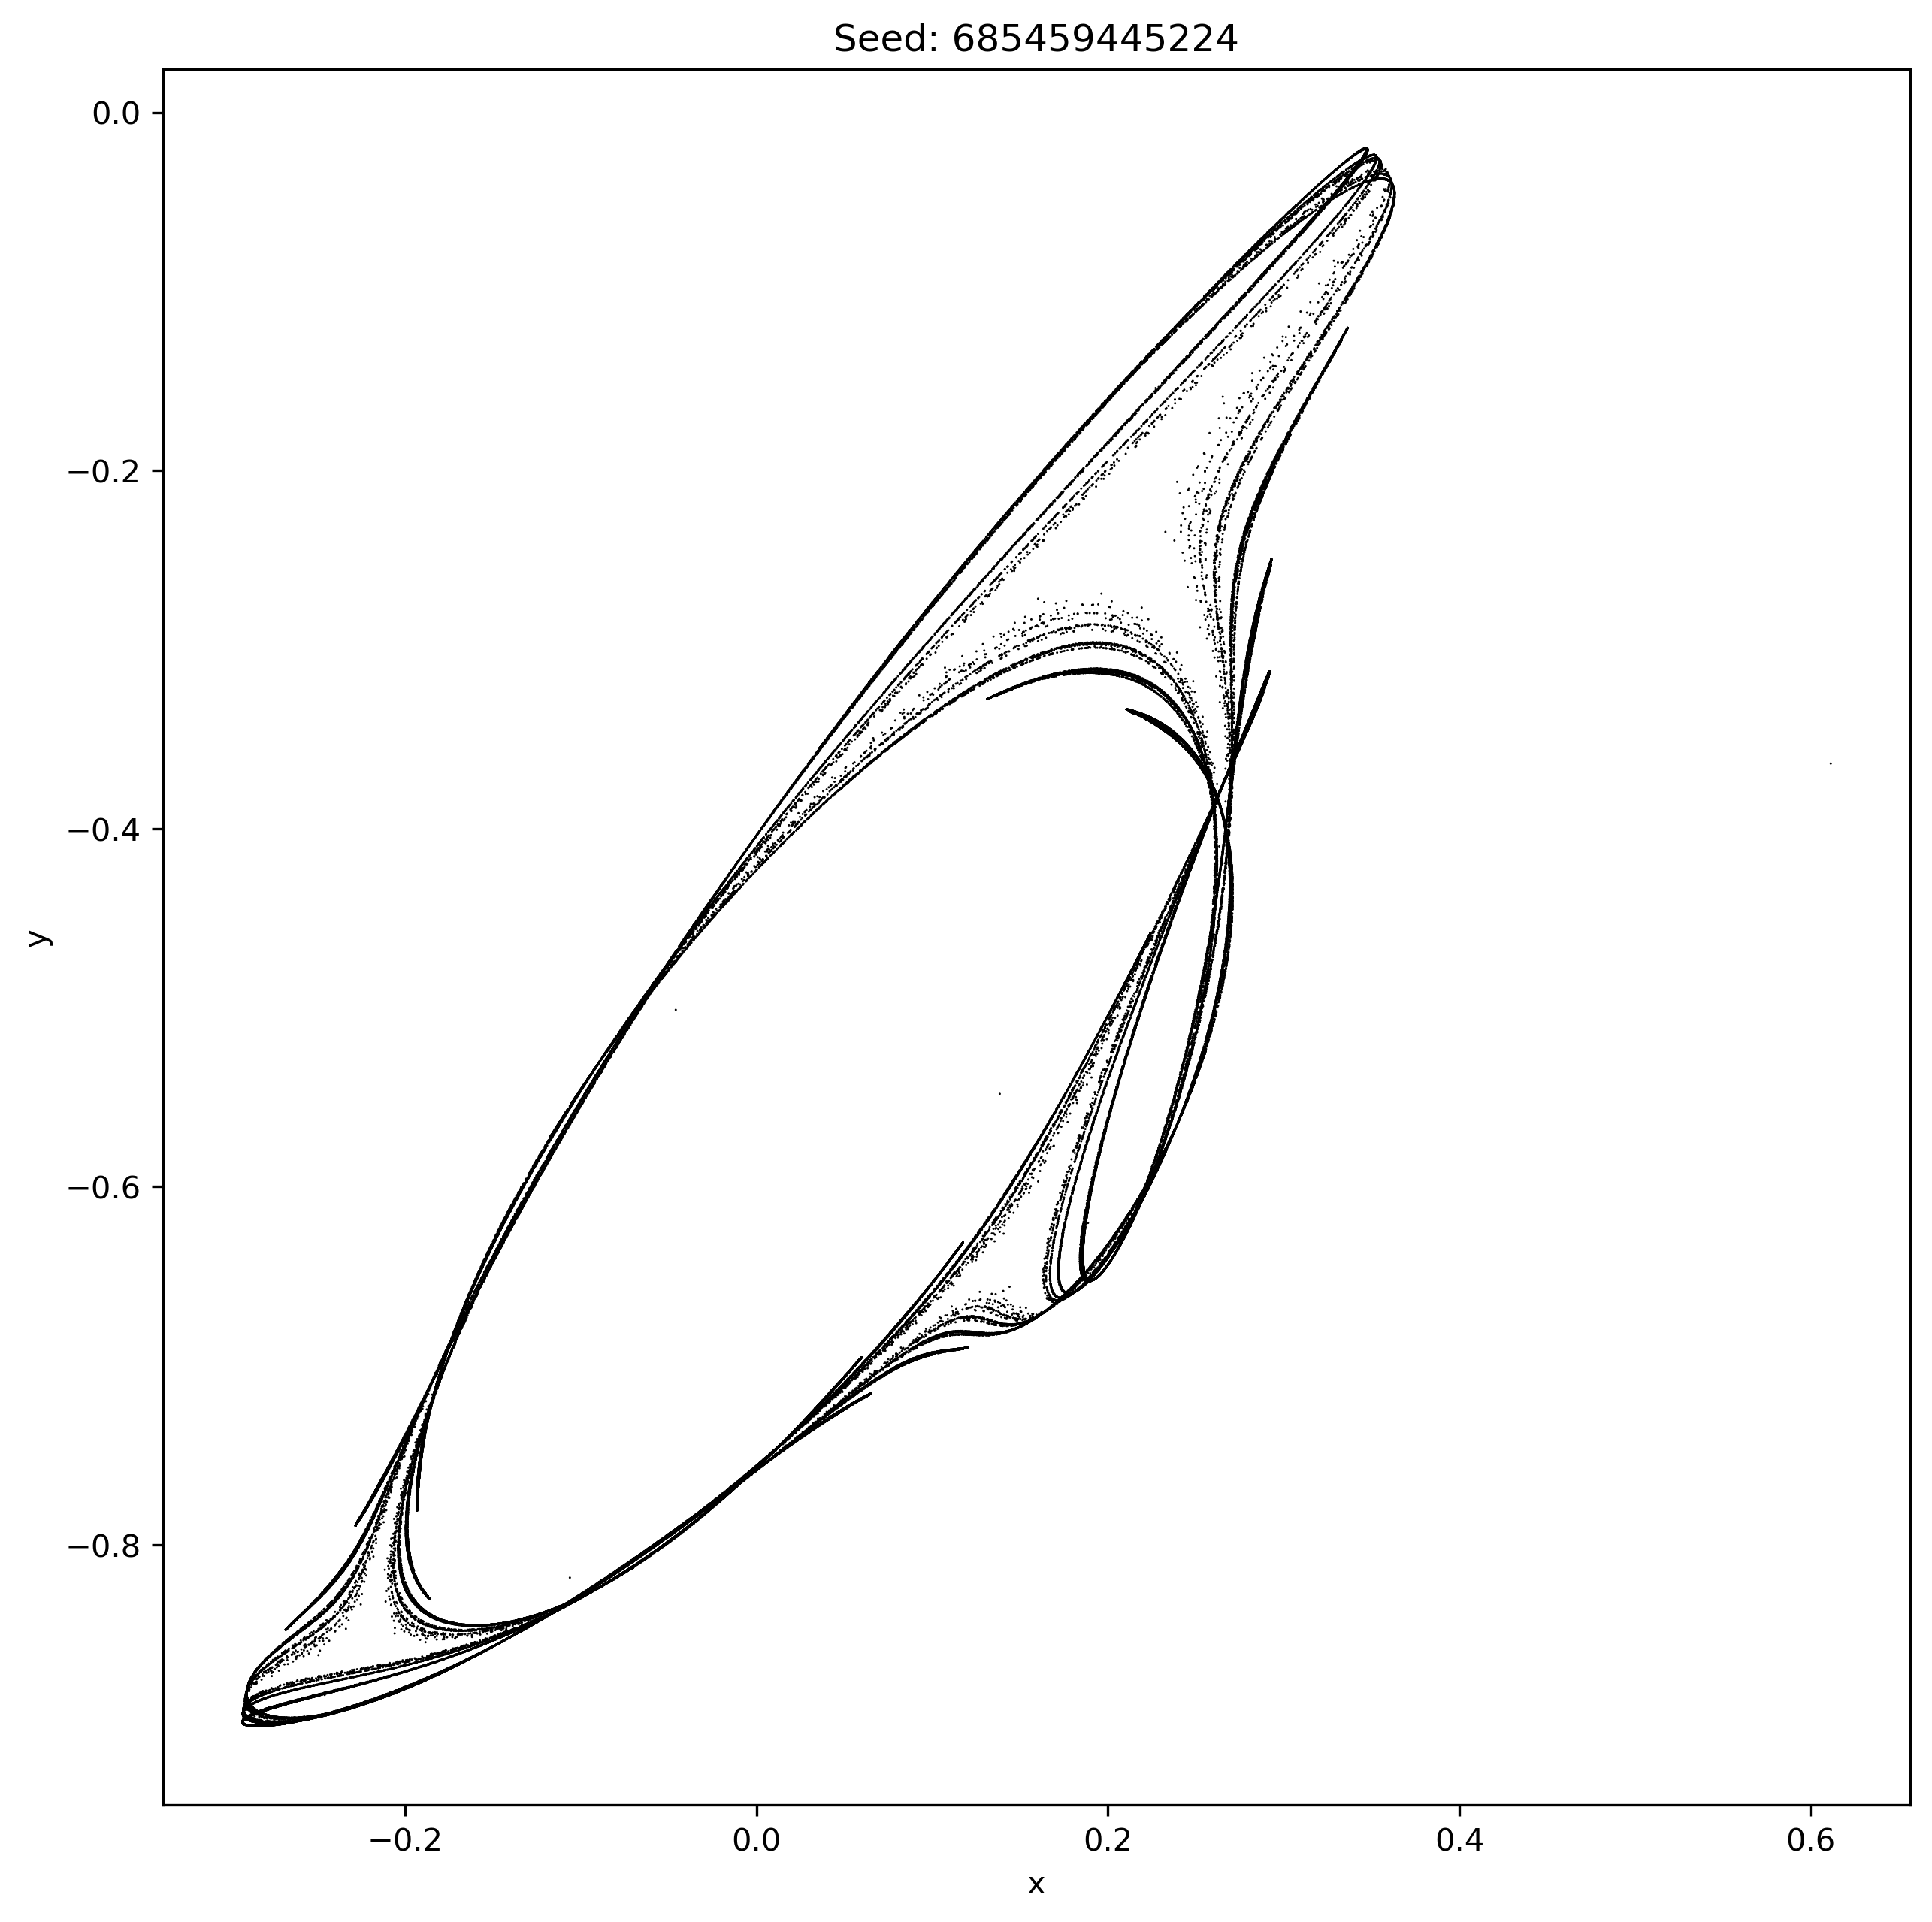{width=600px}

I planned on plotting a bifurcation diagram for this (using the standard method, of taking just the x coordinates, and plotting each set of x coordinates as the y coordinates in a scatter plot with the x axis being the value for cx) , varying cx from 0 to the value stated above. But when I did, I got this:

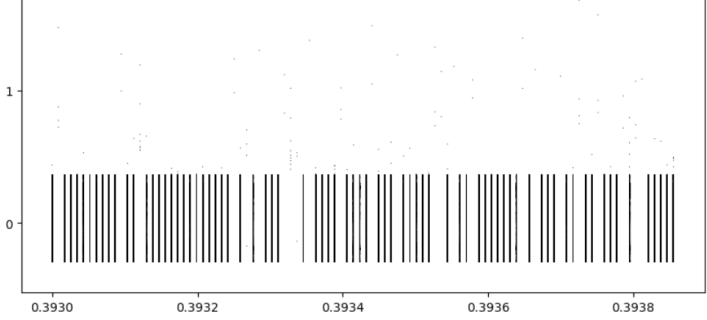{width=600px}

Which is weird, since it seems a random proportion of the values of cx cause divergence to infinity. (I restricted the points so that any large points are not plotted).

I even tried restricting the range of cx to within 1e-12 of the value, and it still resulted in random values of cx causing divergence to infinity and others staying with the strange attractor.

So it seems that there is no trend, and that the system is perhaps infinitely sensitive to the value of cx. I found that even between multiple runs of the code, a different number of the values caused divergence.

Because of the randomness even between runs, I have tried to calculate the average proportion of divergence. It seems the proportion is around 70% non-divergence.

I wonder if this proportion is the same for all ranges of cx?


In [8]:
parameters = {
    "cx": 0.3838553316339084,
    "ax1": -0.899810341784411,
    "ax2": 1.9205488476943802,
    "bx1": 0.12453878265145724,
    "bx2": -0.8166571696362626,
    "abx": 1.1693540077638689,
    "cy": -0.3785235686217754,
    "ay1": -0.3015972313215656,
    "ay2": 1.6636275870850334,
    "by1": 0.919314974001602,
    "by2": 0.65431157442239,
    "aby": 1.6164791960203302,
}

# Calculate the average number of successes
success_percentage_history = []
for i in range(100):

    bifurcation_steps = 100
    quadratic_iterations = 1000
    history = np.zeros((bifurcation_steps, quadratic_iterations))

    # success, seed, xs, ys = quadratic_map(iterations=quadratic_iterations, parameters=parameters, check_limits_and_convergence=False)
    # side_on = xs

    # Plot side_on as a 1d set of points
    # fig, ax = plt.subplots(figsize=(10, 10))
    # ax.scatter(x=np.ones(side_on.shape[0]), y=side_on, s=0.5, c="black", edgecolors="none")


    # Iterate cx from 0 to a floating value
    val_array = np.linspace(0.39385533163390, 0.3938553316339084, bifurcation_steps)
    successes = np.full(bifurcation_steps, -1)
    for index, cx in enumerate(val_array):
        parameters["cx"] = cx
        success, seed, xs, ys = quadratic_map(iterations=quadratic_iterations, parameters=parameters, check_convergence=False, value_limit=10)
        # plot_quadratic_map(xs, ys, seed, save=True)
        successes[index] = success

        side_on = xs
        history[index, :] = side_on

    # Plot bifurcation
    # How to plot each column of history as a set of points for each value in val_array?
    # fig, ax = plt.subplots(figsize=(10, 10))
    # for index, cx in enumerate(val_array):
    #     ax.scatter(x=np.ones(history.shape[1]) * index, y=history[index, :], s=0.5, c="black", edgecolors="none")

    # How many successes were there?
    print(f"Successes: {np.sum(successes == 1)}, Failures: {np.sum(successes == 0)}, Percentage: {np.sum(successes == 1) / bifurcation_steps * 100}%")
    success_percentage_history.append(np.sum(successes == 1) / bifurcation_steps * 100)

print(f"Average success percentage: {np.mean(success_percentage_history)}%")

Successes: 68, Failures: 32, Percentage: 68.0%
Successes: 70, Failures: 30, Percentage: 70.0%
Successes: 69, Failures: 31, Percentage: 69.0%
Successes: 72, Failures: 28, Percentage: 72.0%
Successes: 76, Failures: 24, Percentage: 76.0%
Successes: 71, Failures: 29, Percentage: 71.0%
Successes: 71, Failures: 29, Percentage: 71.0%
Successes: 77, Failures: 23, Percentage: 77.0%
Successes: 65, Failures: 35, Percentage: 65.0%
Successes: 73, Failures: 27, Percentage: 73.0%
Successes: 70, Failures: 30, Percentage: 70.0%
Successes: 70, Failures: 30, Percentage: 70.0%
Successes: 65, Failures: 35, Percentage: 65.0%
Successes: 66, Failures: 34, Percentage: 66.0%
Successes: 78, Failures: 22, Percentage: 78.0%
Successes: 75, Failures: 25, Percentage: 75.0%
Successes: 78, Failures: 22, Percentage: 78.0%
Successes: 74, Failures: 26, Percentage: 74.0%
Successes: 82, Failures: 18, Percentage: 82.0%
Successes: 67, Failures: 33, Percentage: 67.0%
Successes: 69, Failures: 31, Percentage: 69.0%
Successes: 69